# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 25.09.2022

Мягкий дедлайн: 23:59MSK 10.10.2022

Жесткий дедлайн: 23:59MSK 18.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
# !pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
df = pd.read_csv("train.csv")

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
df.head(2)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
df.drop("dropoff_datetime", axis=1, inplace=True)

In [8]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

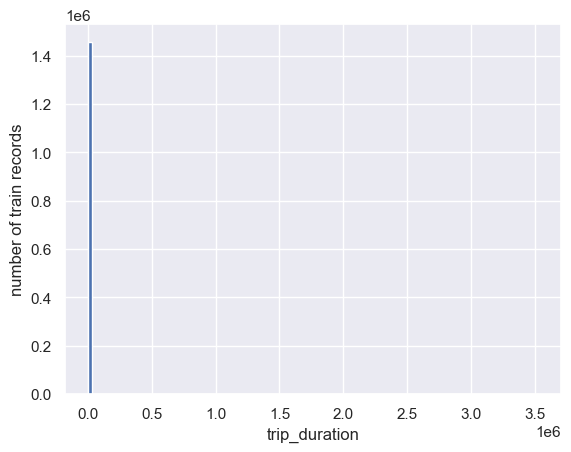

In [10]:
plt.hist(df["trip_duration"], bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

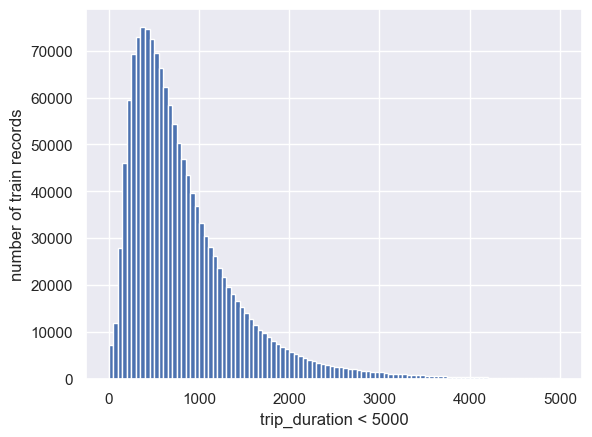

In [11]:
plt.hist(df[df["trip_duration"] < 5000]["trip_duration"], bins=100)
plt.xlabel('trip_duration < 5000')
plt.ylabel('number of train records')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

In [12]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
y_true = [10, 1000, 10000, 1000, 10000]
y_pred = [15, 1005, 10005, 1500, 15000]
assert len(y_true) == len(y_pred)
for i in range(len(y_true)):
    print(f"RMSE: {mean_squared_error([y_true[i]], [y_pred[i]]):.10}, RMSLE: {mean_squared_log_error([y_true[i]],[ y_pred[i]], squared=False):.10}")

print(f"RMSE: {mean_squared_error(y_true, y_pred):.10}, RMSLE: {mean_squared_log_error(y_true, y_pred, squared=False):.10}")

print(f"RMSE: {mean_squared_error([10], [100]):.10}, RMSLE: {mean_squared_log_error([10], [100], squared=False):.10}")

RMSE: 25.0, RMSLE: 0.3746934494
RMSE: 25.0, RMSLE: 0.004982571344
RMSE: 25.0, RMSLE: 0.0004998250716
RMSE: 250000.0, RMSLE: 0.4051320523
RMSE: 25000000.0, RMSLE: 0.4054317776
RMSE: 5050015.0, RMSLE: 0.3062440736
RMSE: 8100.0, RMSLE: 2.217225244


In [13]:
import math
for i in range(100):
    print(round(math.exp(i), 2), end=", ")

1.0, 2.72, 7.39, 20.09, 54.6, 148.41, 403.43, 1096.63, 2980.96, 8103.08, 22026.47, 59874.14, 162754.79, 442413.39, 1202604.28, 3269017.37, 8886110.52, 24154952.75, 65659969.14, 178482300.96, 485165195.41, 1318815734.48, 3584912846.13, 9744803446.25, 26489122129.84, 72004899337.39, 195729609428.84, 532048240601.8, 1446257064291.48, 3931334297144.04, 10686474581524.46, 29048849665247.43, 78962960182680.69, 214643579785916.06, 583461742527454.9, 1586013452313430.8, 4311231547115195.0, 1.1719142372802612e+16, 3.1855931757113756e+16, 8.659340042399374e+16, 2.3538526683702e+17, 6.398434935300549e+17, 1.739274941520501e+18, 4.727839468229346e+18, 1.2851600114359308e+19, 3.4934271057485095e+19, 9.496119420602448e+19, 2.5813128861900675e+20, 7.016735912097631e+20, 1.9073465724950998e+21, 5.184705528587072e+21, 1.4093490824269389e+22, 3.831008000716577e+22, 1.0413759433029089e+23, 2.830753303274694e+23, 7.694785265142018e+23, 2.091659496012996e+24, 5.685719999335932e+24, 1.545538935590104e+25, 4

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [14]:
df["log_trip_duration"] = np.log1p(df["trip_duration"])
df.drop("trip_duration", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   log_trip_duration   1458644 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 111.3+ MB


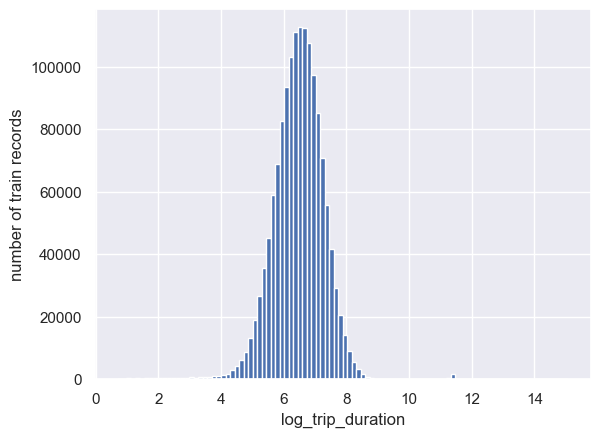

In [15]:
plt.hist(df["log_trip_duration"], bins=100)
plt.xlabel('log_trip_duration')
plt.ylabel('number of train records')
plt.show()

In [16]:
print(np.expm1(4), np.expm1(8))

53.598150033144236 2979.9579870417283


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [17]:
# https://www.kaggle.com/code/carlolepelaars/understanding-the-metric-rmsle/notebook#Best-baselines-
best_constant = np.exp(np.mean(df["log_trip_duration"]))
print(best_constant)

y_true = np.array(df["log_trip_duration"]).reshape(-1)
y_pred = np.array([best_constant] * df["log_trip_duration"]).reshape(-1)
# print(y_true.shape, y_pred.shape)
print("RMSLE with best constant:", mean_squared_log_error(y_true, y_pred, squared=False))

643.5362830079474
RMSLE with best constant: 6.321230951325369


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [18]:
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  log_trip_duration  
0                  N           6.122493  
1                  N           6.498282  
2                  N           7.661527  
3                  N           6.063785  
4                  N           6.077642

In [19]:
pickup_dates = df.groupby(by=[df.pickup_datetime.dt.date]).size()
pickup_dates

pickup_datetime
2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
              ... 
2016-06-26    7084
2016-06-27    7311
2016-06-28    7253
2016-06-29    7623
2016-06-30    7588
Length: 182, dtype: int64

In [20]:
pickup_dates.index = pickup_dates.index.astype(str)

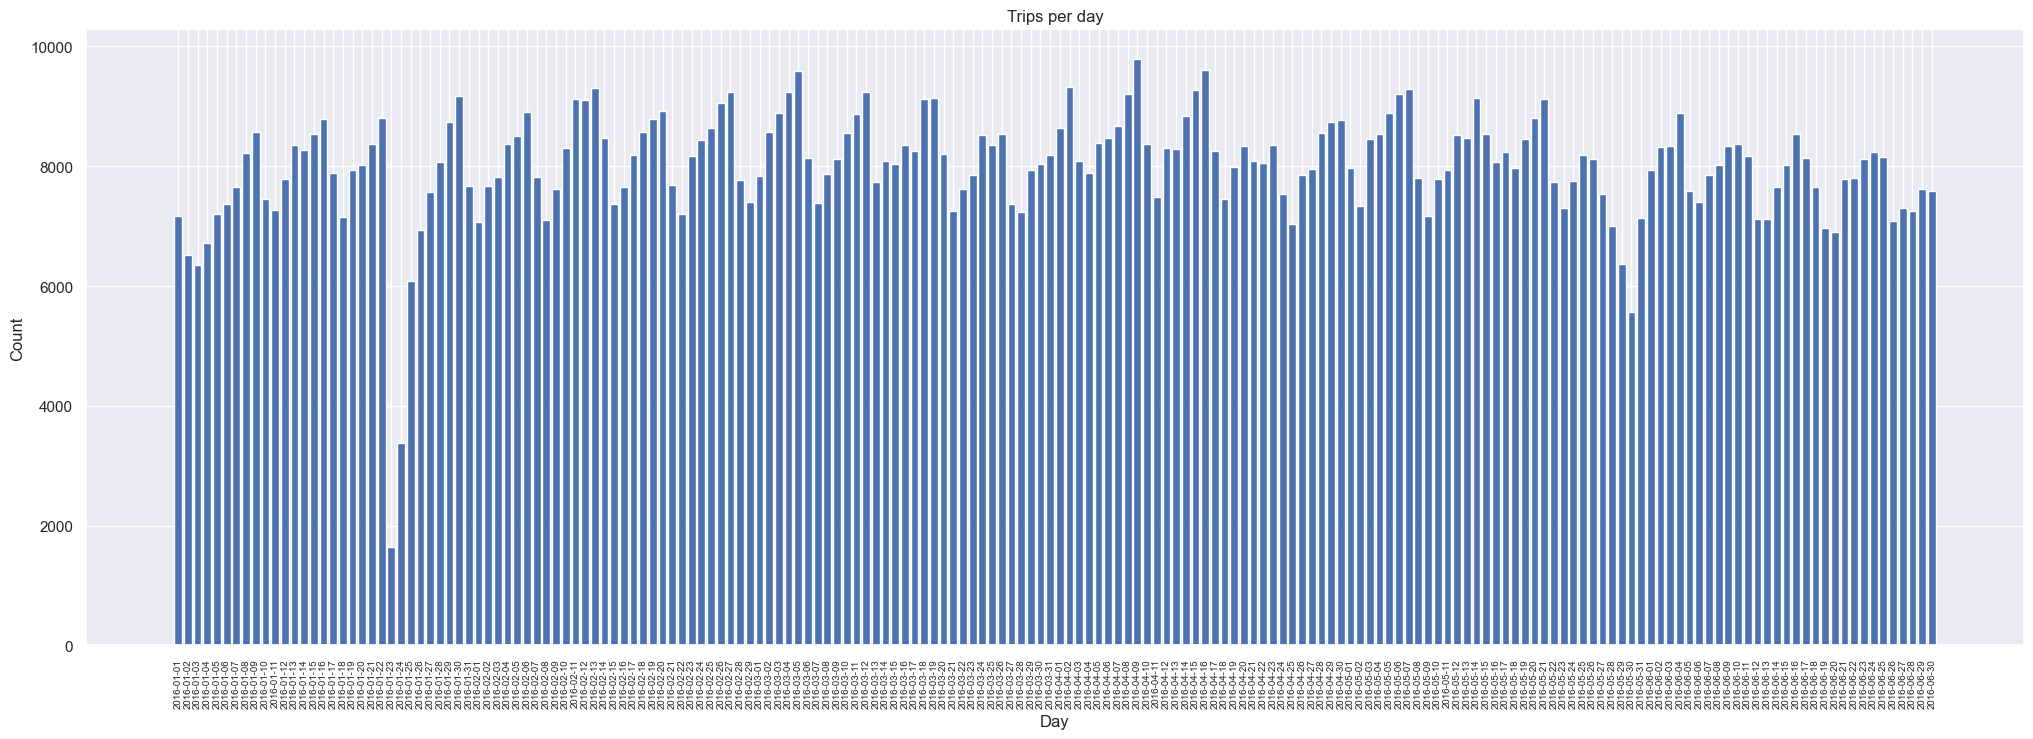

In [21]:
plt.figure(figsize = (25, 8))
plt.bar(pickup_dates.index, pickup_dates.values)
plt.xticks(rotation = 90, fontsize=7)
plt.title('Trips per day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

In [22]:
df['pickup_datetime'].dt.date.value_counts(ascending=True)[:2]

pickup_datetime
2016-01-23    1648
2016-01-24    3383
Name: count, dtype: int64

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [23]:
pickup_dates = df.groupby(by=[df.pickup_datetime.dt.weekday]).size().to_frame().reset_index()
pickup_dates.columns = ["day_of_week", "count_trips"]
pickup_dates

day_of_week  count_trips
0            0       187418
1            1       202749
2            2       210136
3            3       218574
4            4       223533
5            5       220868
6            6       195366

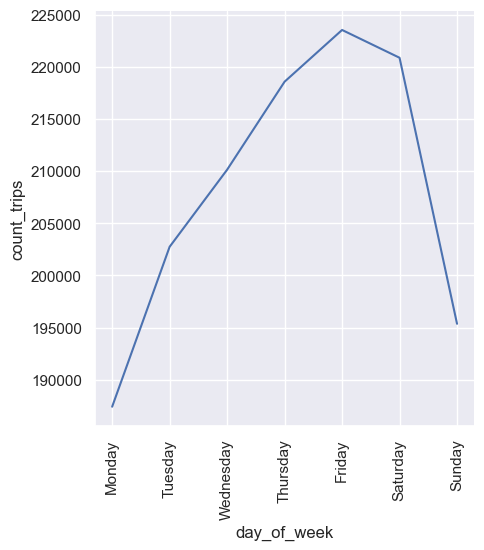

In [24]:
grid = sns.relplot(x="day_of_week",  y="count_trips", data=pickup_dates, kind="line")
for ax in grid.axes.ravel():
    ax.set_xticks(range(7))
    ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=90)

In [25]:
pickup_dates = df.groupby(by=[df.pickup_datetime.dt.hour]).size().to_frame().reset_index()
pickup_dates.columns = ["hour", "count_trips"]
pickup_dates

hour  count_trips
0      0        53248
1      1        38571
2      2        27972
3      3        20895
4      4        15792
5      5        15002
6      6        33248
7      7        55600
8      8        67053
9      9        67663
10    10        65437
11    11        68476
12    12        71873
13    13        71473
14    14        74292
15    15        71811
16    16        64313
17    17        76483
18    18        90600
19    19        90308
20    20        84072
21    21        84185
22    22        80492
23    23        69785

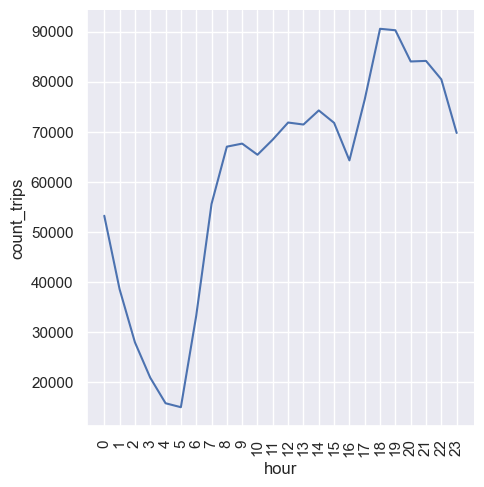

In [26]:
grid = sns.relplot(x="hour",  y="count_trips", data=pickup_dates, kind="line")
for ax in grid.axes.ravel():
    ax.set_xticks(range(24))
    ax.set_xticklabels(list(range(24)), rotation=90)

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [27]:
pickup_dates = df.groupby(by=[df.pickup_datetime.dt.hour, df.pickup_datetime.dt.month_name()]).size().to_frame().reset_index(names=["hour", "month"])
pickup_dates.columns = ["hour", "month", "count_trips"]
pickup_dates

hour     month  count_trips
0       0     April         9185
1       0  February         8445
2       0   January         8330
3       0      June         9150
4       0     March         8992
..    ...       ...          ...
139    23  February        11042
140    23   January        10241
141    23      June        11899
142    23     March        12172
143    23       May        11928

[144 rows x 3 columns]

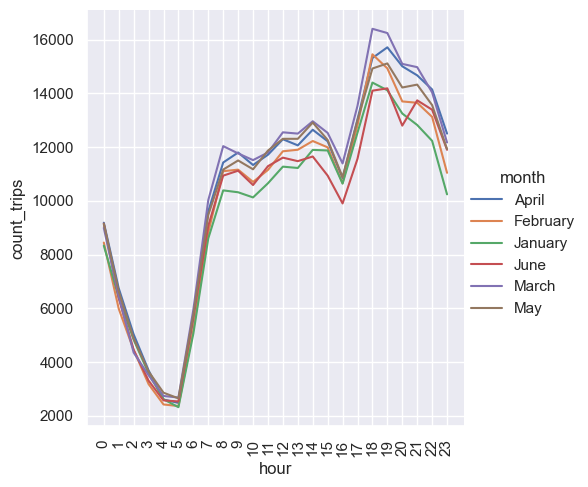

In [28]:
grid = sns.relplot(x="hour",  y="count_trips", hue="month", data=pickup_dates, kind="line")
for ax in grid.axes.ravel():
    ax.set_xticks(range(24))
    ax.set_xticklabels(list(range(24)), rotation=90)

In [29]:
pickup_dates = df.groupby(by=[df.pickup_datetime.dt.hour, df.pickup_datetime.dt.day_name()]).size().to_frame().reset_index(names=["hour", "weekday"])
pickup_dates.columns = ["hour", "weekday", "count_trips"]
pickup_dates

hour    weekday  count_trips
0       0     Friday         8779
1       0     Monday         4299
2       0   Saturday        11768
3       0     Sunday        12270
4       0   Thursday         6299
..    ...        ...          ...
163    23   Saturday        13166
164    23     Sunday         6367
165    23   Thursday        11715
166    23    Tuesday         8656
167    23  Wednesday         9735

[168 rows x 3 columns]

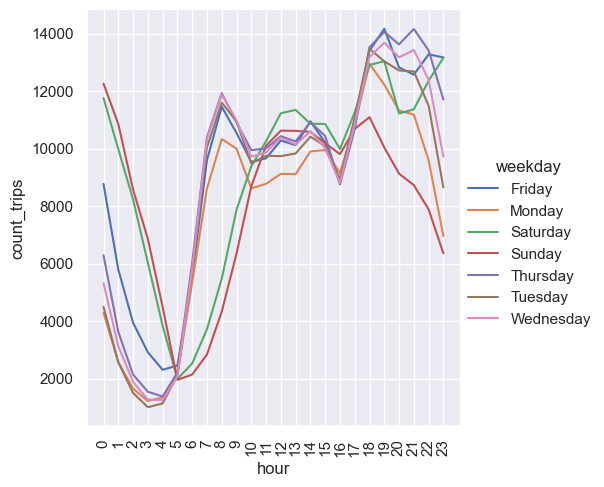

In [30]:
grid = sns.relplot(x="hour",  y="count_trips", hue="weekday", data=pickup_dates, kind="line")
for ax in grid.axes.ravel():
    ax.set_xticks(range(24))
    ax.set_xticklabels(list(range(24)), rotation=90)

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [31]:
random_state = 5814

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train, test = train_test_split(df, test_size=0.3, random_state=random_state)
train.shape, test.shape

((1021050, 10), (437594, 10))

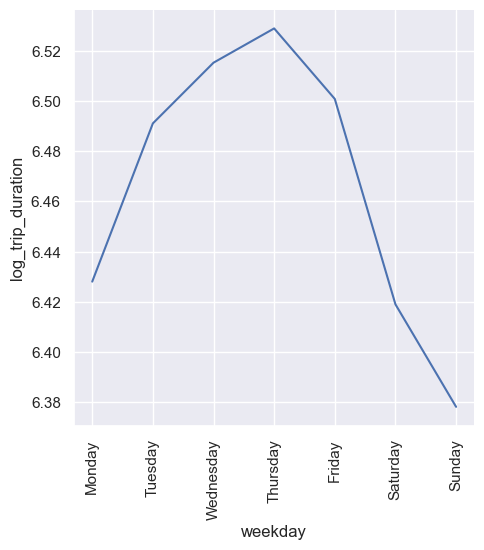

In [34]:
pickup_dates = train.groupby(by=[train.pickup_datetime.dt.weekday])["log_trip_duration"].mean().to_frame().reset_index(names=["weekday"])
grid = sns.relplot(x="weekday",  y="log_trip_duration", data=pickup_dates, kind="line")
for ax in grid.axes.ravel():
    ax.set_xticks(range(7))
    ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=90)

C:\Users\Maxim\AppData\Local\Temp\ipykernel_3404\3493301833.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


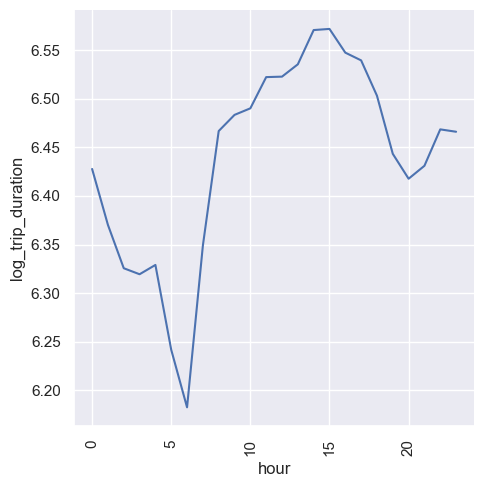

In [35]:
pickup_dates = train.groupby(by=[train.pickup_datetime.dt.hour])["log_trip_duration"].mean().to_frame().reset_index(names=["hour"])
grid = sns.relplot(x="hour",  y="log_trip_duration", data=pickup_dates, kind="line")
for ax in grid.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

C:\Users\Maxim\AppData\Local\Temp\ipykernel_3404\503074766.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


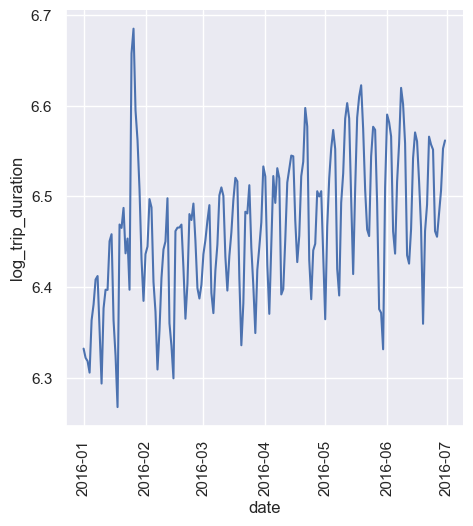

In [36]:
pickup_dates = train.groupby(by=[train.pickup_datetime.dt.date])["log_trip_duration"].mean().to_frame().reset_index(names=["date"])
grid = sns.relplot(x="date",  y="log_trip_duration", data=pickup_dates, kind="line")
for ax in grid.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [37]:
train["weekday"] = train.pickup_datetime.dt.weekday
train["month"] = train.pickup_datetime.dt.month
train["hour"] = train.pickup_datetime.dt.hour
train["day_of_year"] = train.pickup_datetime.dt.day_of_year

test["weekday"] = test.pickup_datetime.dt.weekday
test["month"] = test.pickup_datetime.dt.month
test["hour"] = test.pickup_datetime.dt.hour
test["day_of_year"] = test.pickup_datetime.dt.day_of_year

In [38]:
import datetime as dt

In [39]:
train["anomaly_period"] = False
train.loc[(train.pickup_datetime.dt.date == dt.datetime.strptime("2016-01-23", "%Y-%m-%d").date()) |
   (train.pickup_datetime.dt.date == dt.datetime.strptime("2016-01-24", "%Y-%m-%d").date()), "anomaly_period"] = True

test["anomaly_period"] = False
test.loc[(test.pickup_datetime.dt.date == dt.datetime.strptime("2016-01-23", "%Y-%m-%d").date()) |
   (test.pickup_datetime.dt.date == dt.datetime.strptime("2016-01-24", "%Y-%m-%d").date()), "anomaly_period"] = True

In [40]:
print((train.anomaly_period == True).sum(), (test.anomaly_period == True).sum())

3513 1518


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [41]:
X_train_ridge = train[["weekday", "month", "hour", "day_of_year", "anomaly_period"]].copy()
y_train_ridge = train["log_trip_duration"].to_frame()

X_test_ridge = test[["weekday", "month", "hour", "day_of_year", "anomaly_period"]].copy()
y_test_ridge = test["log_trip_duration"].to_frame()

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge


categorical_features = ["weekday", "month", "hour", "anomaly_period"]
numeric_features = ["day_of_year"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_ridge, y_train_ridge)

y_pred_train_ridge = model.predict(X_train_ridge)
y_pred_test_ridge = model.predict(X_test_ridge)

print("Train RMSE = %.4f" % mean_squared_error(y_train_ridge, y_pred_train_ridge, squared=False))
print("Train RMSLE = %.4f" % mean_squared_log_error(y_train_ridge, y_pred_train_ridge, squared=False))

print("Test RMSE = %.4f" % mean_squared_error(y_test_ridge, y_pred_test_ridge, squared=False))
print("Test RMSLE = %.4f" % mean_squared_log_error(y_test_ridge, y_pred_test_ridge, squared=False))

Train RMSE = 0.7889
Train RMSLE = 0.1124
Test RMSE = 0.7888
Test RMSLE = 0.1126


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [43]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [44]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [45]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [46]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [47]:
train["haversine"] = train.apply(lambda row: haversine(row['dropoff_longitude'],
                                                       row['dropoff_latitude'],
                                                       row['pickup_longitude'],
                                                       row['pickup_latitude']), axis=1)

In [48]:
test["haversine"] = test.apply(lambda row: haversine(row['dropoff_longitude'],
                                                       row['dropoff_latitude'],
                                                       row['pickup_longitude'],
                                                       row['pickup_latitude']), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [49]:
train["log_haversine"] = np.log1p(train["haversine"])
test["log_haversine"] = np.log1p(test["haversine"])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [50]:
train[["log_trip_duration", "log_haversine", "haversine"]].corr()

log_trip_duration  log_haversine  haversine
log_trip_duration           1.000000       0.749627   0.566954
log_haversine               0.749627       1.000000   0.835500
haversine                   0.566954       0.835500   1.000000

In [51]:
test[["log_trip_duration", "log_haversine", "haversine"]].corr()

log_trip_duration  log_haversine  haversine
log_trip_duration           1.000000       0.750479   0.590053
log_haversine               0.750479       1.000000   0.866846
haversine                   0.590053       0.866846   1.000000

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [52]:
u_mean = train["haversine"].to_numpy() / np.expm1(train["log_trip_duration"]).to_numpy()

(array([1.021037e+06, 9.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([0.        , 0.25763435, 0.51526871, 0.77290306, 1.03053741,
        1.28817177, 1.54580612, 1.80344048, 2.06107483, 2.31870918,
        2.57634354]),
 <BarContainer object of 10 artists>)

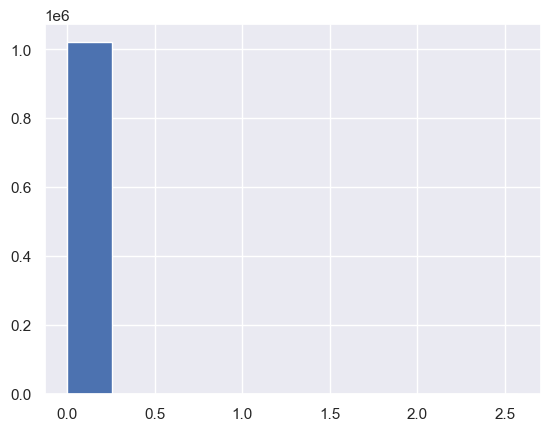

In [53]:
plt.hist(u_mean)

In [54]:
u_mean[u_mean > 0.5]

array([1.45861555, 1.56680388, 2.57634354, 1.13519778])

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

(array([ 61855., 311399., 325216., 172625.,  78949.,  36705.,  18151.,
          9264.,   4221.,   1587.]),
 array([0.        , 0.00149985, 0.00299971, 0.00449956, 0.00599942,
        0.00749927, 0.00899913, 0.01049898, 0.01199883, 0.01349869,
        0.01499854]),
 <BarContainer object of 10 artists>)

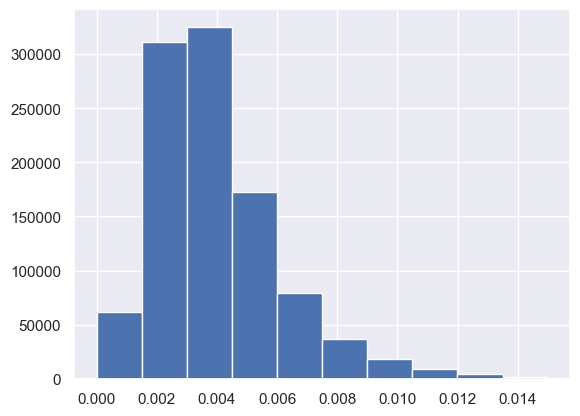

In [55]:
plt.hist(u_mean[u_mean < 0.015])

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [56]:
train["u_mean"] = u_mean

In [57]:
hm_values = train.groupby(by=[train.weekday, train.hour])["u_mean"].median().to_frame().reset_index(names=["weekday", "hour"])
hm_values

weekday  hour    u_mean
0          0     0  0.005651
1          0     1  0.005650
2          0     2  0.005737
3          0     3  0.005677
4          0     4  0.006688
..       ...   ...       ...
163        6    19  0.003916
164        6    20  0.004237
165        6    21  0.004544
166        6    22  0.004790
167        6    23  0.005154

[168 rows x 3 columns]

In [58]:
hm = pd.DataFrame(columns=hm_values["hour"].unique())

In [59]:
hm

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Index: []

[0 rows x 24 columns]

In [60]:
weekdays = hm_values["weekday"].unique()

In [61]:
for wd in weekdays:
    hm.loc[wd] = hm_values[hm_values["weekday"] == wd]["u_mean"].to_numpy()

In [62]:
hm

0         1         2         3         4         5         6   \
0  0.005651  0.005650  0.005737  0.005677  0.006688  0.006600  0.005178   
1  0.005265  0.005570  0.005705  0.006042  0.006373  0.006261  0.005003   
2  0.004978  0.005426  0.005535  0.005755  0.006301  0.006275  0.005067   
3  0.004797  0.005295  0.005524  0.005922  0.006272  0.006163  0.005135   
4  0.004450  0.004832  0.005076  0.005299  0.005870  0.006298  0.005211   
5  0.003925  0.004327  0.004533  0.004848  0.005266  0.006323  0.006095   
6  0.003971  0.004275  0.004596  0.004867  0.005240  0.006134  0.006586   

         7         8         9   ...        14        15        16        17  \
0  0.004017  0.003179  0.003010  ...  0.003168  0.003217  0.003344  0.003335   
1  0.003751  0.002870  0.002671  ...  0.002735  0.002767  0.002989  0.003031   
2  0.003735  0.002913  0.002665  ...  0.002656  0.002683  0.002911  0.002894   
3  0.003745  0.002882  0.002689  ...  0.002700  0.002724  0.002889  0.002934   
4  0.003855  0.003020  0.002733  ...  0.002928  0.002865  0.003059  0.003078   
5  0.005400  0.004777  0.004261  ...  0.003378  0.003362  0.003403  0.003352   
6  0.005935  0.005164  0.004871  ...  0.003654  0.003655  0.003689  0.003704   

         18        19        20        21        22        23  
0  0.003376  0.003802  0.004246  0.004403  0.004546  0.004982  
1  0.003050  0.003446  0.003917  0.004099  0.004334  0.004641  
2  0.002953  0.003275  0.003757  0.003989  0.004116  0.004445  
3  0.002935  0.003218  0.003624  0.003768  0.003888  0.004173  
4  0.003097  0.003210  0.003523  0.003620  0.003615  0.003715  
5  0.003244  0.003119  0.003371  0.003562  0.003541  0.003709  
6  0.003724  0.003916  0.004237  0.004544  0.004790  0.005154  

[7 rows x 24 columns]

<Axes: >

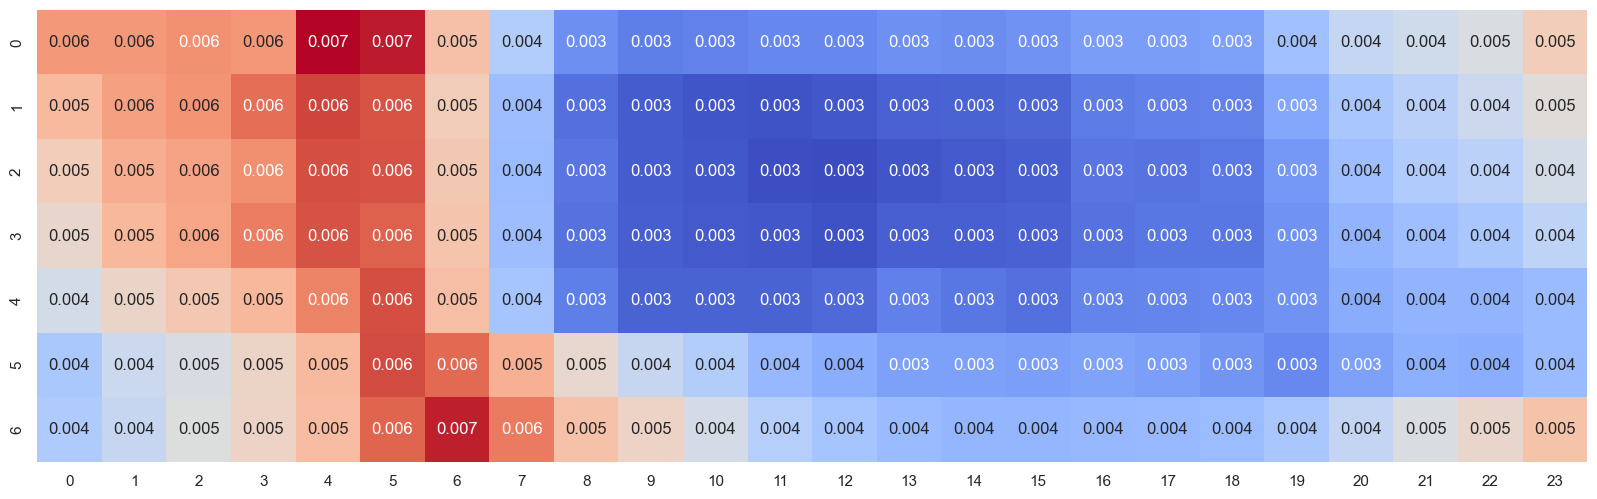

In [63]:
fig = plt.figure(figsize = (20, 15))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(hm, annot=True, fmt='.3f', cmap="coolwarm", ax=ax, square=True, cbar=False)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [64]:
train.drop("u_mean", axis=1, inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [65]:
train["traffic_jam"] = False
train.loc[(train["hour"] >= 8) & (train["hour"] <= 18), "traffic_jam"] = True

train["traffic_free"] = False
train.loc[(train["weekday"] >= 0) & (train["weekday"] <= 4) & (train["hour"] >= 1) & (train["hour"] <= 6), "traffic_free"] = True

In [66]:
test["traffic_jam"] = False
test.loc[(test["hour"] >= 8) & (test["hour"] <= 18), "traffic_jam"] = True

test["traffic_free"] = False
test.loc[(test["weekday"] >= 0) & (test["weekday"] <= 4) & (test["hour"] >= 1) & (test["hour"] <= 6), "traffic_free"] = True

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [67]:
def draw_point_on_map(df, N):
    city_long_border = (-74.2, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.figure(figsize=(15,15))
    plt.scatter(df['pickup_longitude'].values[:N], df['pickup_latitude'].values[:N],
                  color='blue', s=1, label='train', alpha=0.1)
    plt.ylabel('latitude')
    plt.xlabel('longitude')
    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

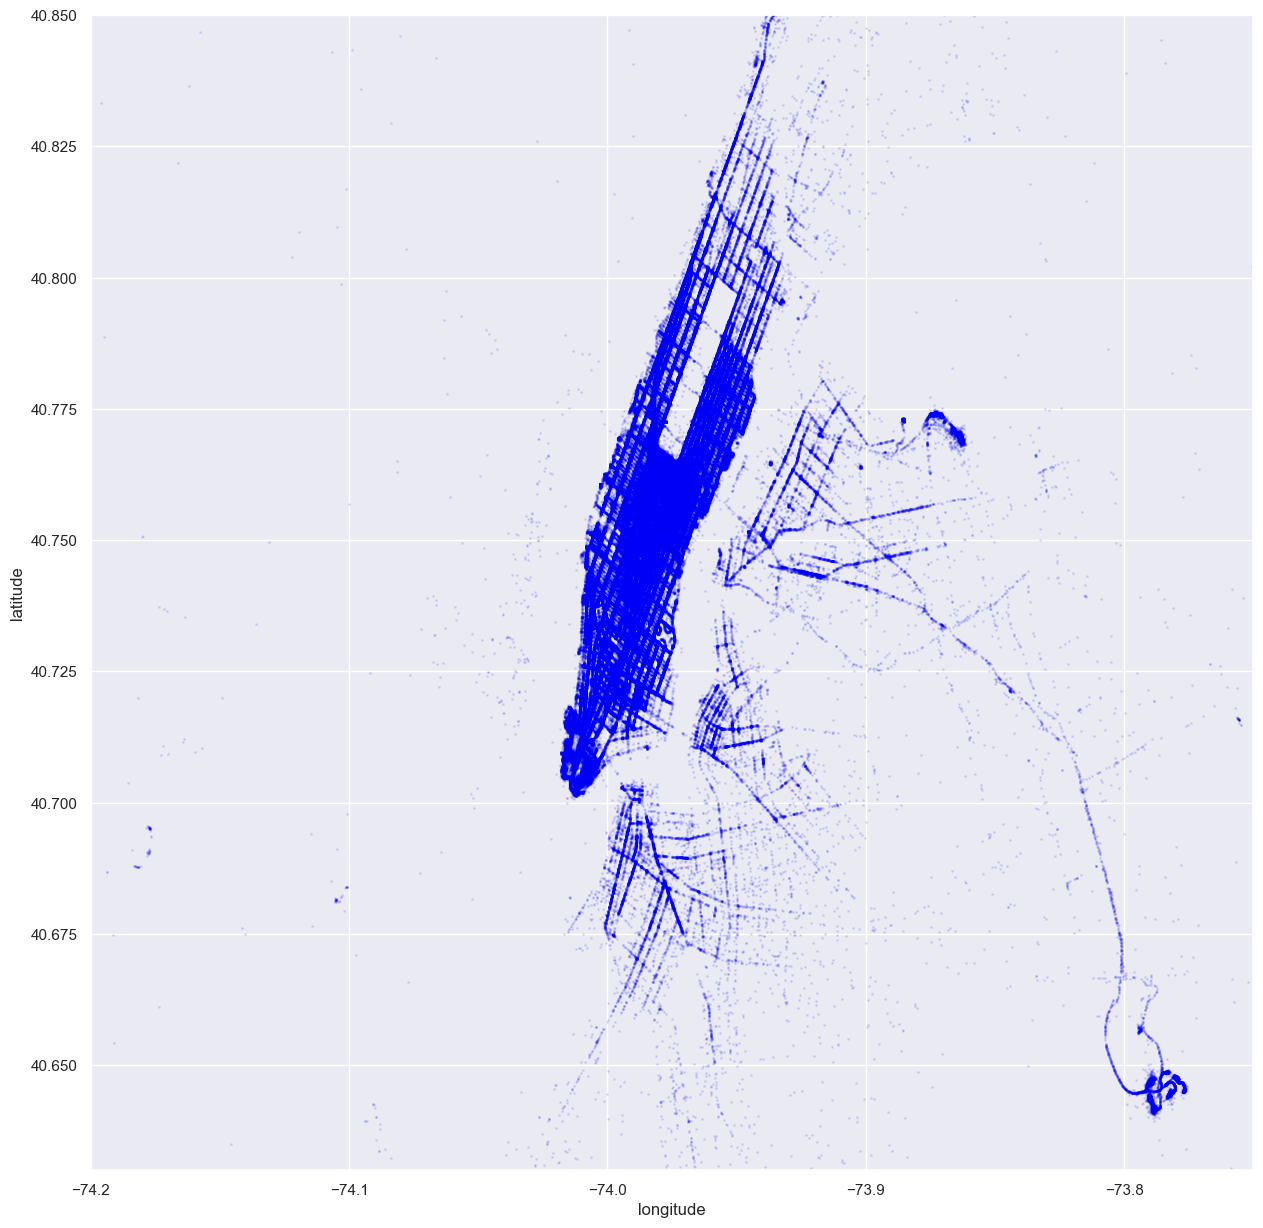

In [68]:
draw_point_on_map(train, 1000000)

In [69]:
train["start_airport"] = False
train.loc[( ((train["pickup_longitude"]) >= -73.8) & ((train["pickup_latitude"]) <= 40.650) ) |
          ( train["pickup_longitude"] <= -74.1 ),
"start_airport"] = True

train["end_airport"] = False
train.loc[( ((train["dropoff_longitude"]) >= -73.8) & ((train["dropoff_latitude"]) <= 40.650) ) |
          ( train["dropoff_longitude"] <= -74.1 ),
"end_airport"] = True

In [70]:
test["start_airport"] = False
test.loc[( ((test["pickup_longitude"]) >= -73.8) & ((test["pickup_latitude"]) <= 40.650) ) |
          ( test["pickup_longitude"] <= -74.1 ),
"start_airport"] = True

test["end_airport"] = False
test.loc[( ((test["dropoff_longitude"]) >= -73.8) & ((test["dropoff_latitude"]) <= 40.650) ) |
          ( test["dropoff_longitude"] <= -74.1 ),
"end_airport"] = True

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

<Axes: xlabel='start_airport', ylabel='log_trip_duration'>

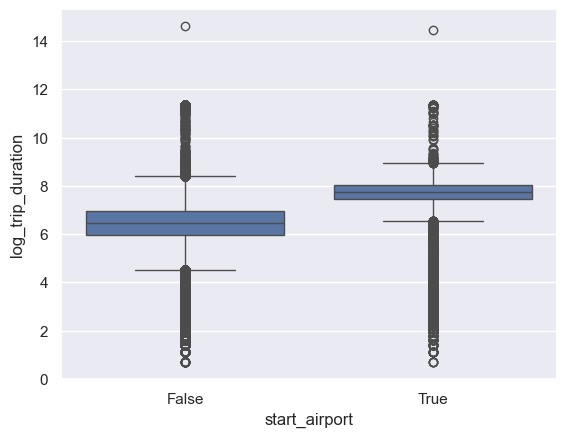

In [71]:
sns.boxplot(x='start_airport', y='log_trip_duration', data=train)

<Axes: xlabel='end_airport', ylabel='log_trip_duration'>

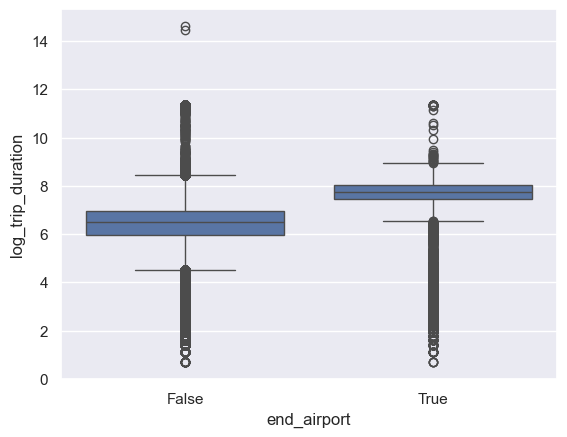

In [72]:
sns.boxplot(x='end_airport', y='log_trip_duration', data=train)

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

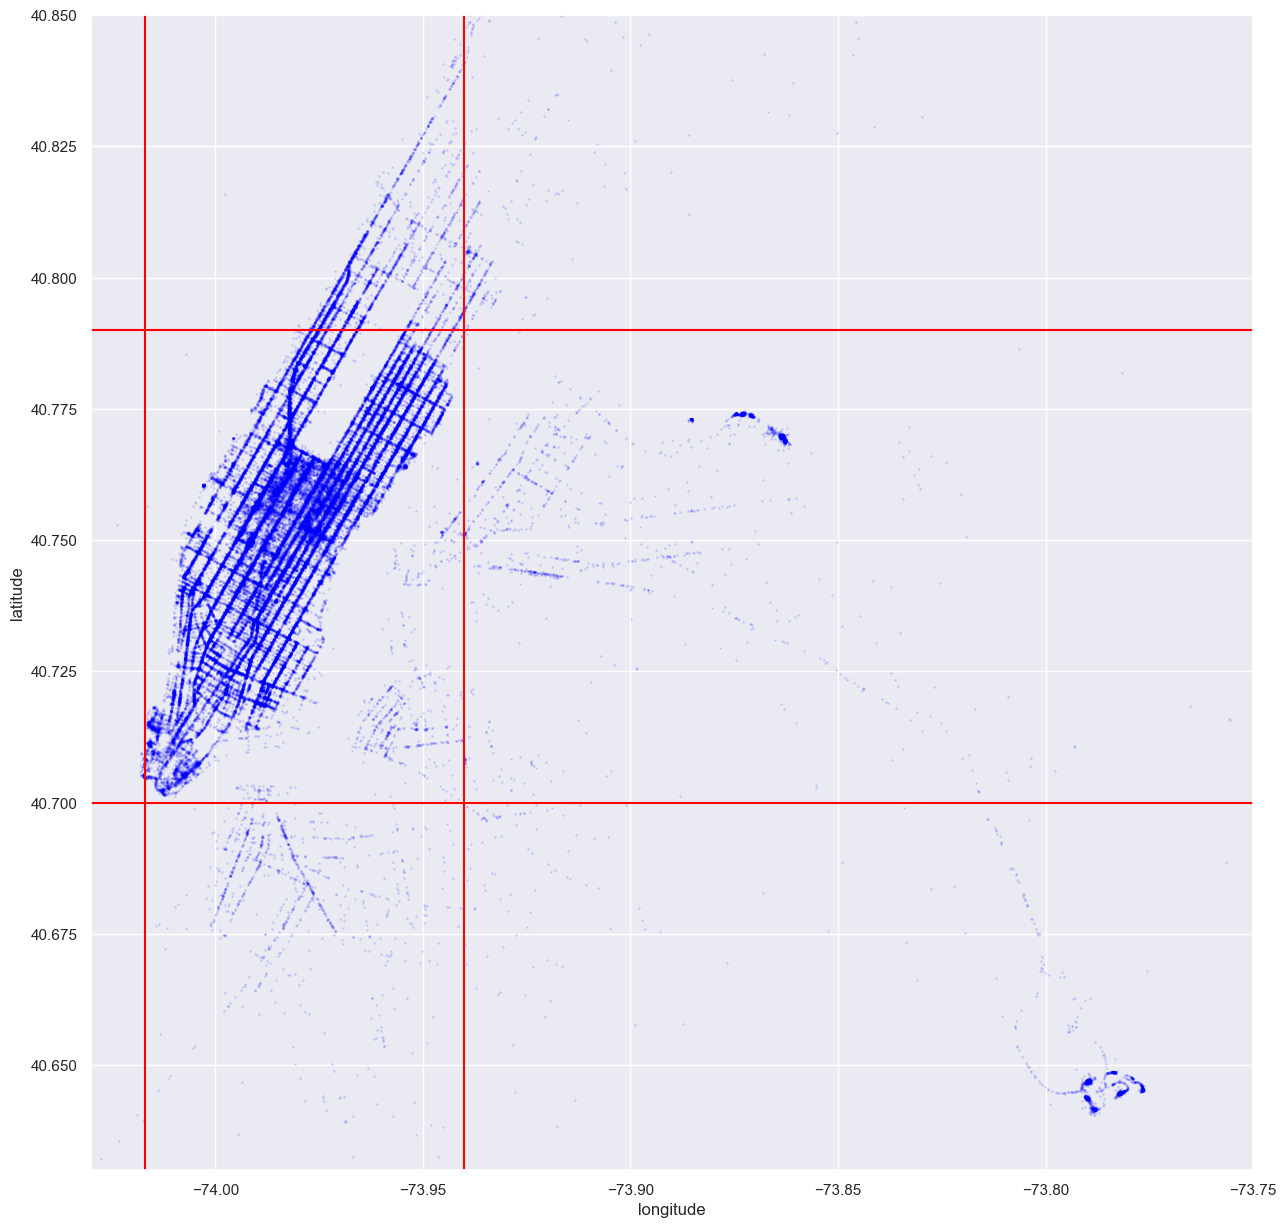

In [73]:
N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)

plt.axvline(x=-74.017, linestyle='-', color='red')
plt.axvline(x=-73.94, linestyle='-', color='red')

plt.axhline(y=40.79, linestyle='-', color='red')
plt.axhline(y=40.7, linestyle='-', color='red')

plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_sq_x, num_sq_y):
        self.num_sq_x = num_sq_x
        self.num_sq_y = num_sq_y

        self.left_x = -74.017
        self.right_x = -73.94

        self.top_y = 40.79
        self.bottom_y = 40.7

        self.len_sq_x = (self.right_x - self.left_x) / self.num_sq_x
        self.len_sq_y = (self.top_y - self.bottom_y) / self.num_sq_y

        self.x_splits = [self.left_x + i * self.len_sq_x for i in range(self.num_sq_x + 1)]
        self.y_splits = [self.bottom_y + i * self.len_sq_y for i in range(self.num_sq_y + 1)]


    def show_map(self, X):
        map = show_circles_on_map(X.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

        for x in self.x_splits:
            line = [(self.top_y, x), (self.bottom_y, x)]
            folium.PolyLine(locations=line, color = 'red', weight=3).add_to(map)

        for y in self.y_splits:
            line = [(y, self.left_x), (y, self.right_x)]
            folium.PolyLine(locations=line, color = 'red', weight=3).add_to(map)

        return map
    
    def fit(self, X=None, y=None):  
        return self

    def transform(self, X, y=None):
        self.X = X.copy()

        self.X['trip_start'] = -1
        self.X['trip_end'] = -1

        for x in range(self.num_sq_x):
            for y in range(self.num_sq_y):
                self.X.loc[(self.X["pickup_longitude"] >= self.x_splits[x]) & (self.X["pickup_longitude"] <= self.x_splits[x + 1]) &
                           (self.X["pickup_latitude"] >= self.y_splits[y]) & (self.X["pickup_latitude"] <= self.y_splits[y + 1]),
                           "trip_start"] = ((self.num_sq_y - y) - 1) * self.num_sq_x + x
                self.X.loc[(self.X["dropoff_longitude"] >= self.x_splits[x]) & (self.X["dropoff_longitude"] <= self.x_splits[x + 1]) &
                           (self.X["dropoff_latitude"] >= self.y_splits[y]) & (self.X["dropoff_latitude"] <= self.y_splits[y + 1]),
                           "trip_end"] = ((self.num_sq_y - y) - 1) * self.num_sq_x + x

        return self.X

In [75]:
mgt = MapGridTransformer(3, 4)
mgt.show_map(train)

In [76]:
train = mgt.transform(train)
test = mgt.transform(test)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [77]:
X_train_ridge = train[["weekday", "month", "hour", "day_of_year", "anomaly_period", "log_haversine",
                       "trip_start", "trip_end", "traffic_jam", "traffic_free"]].copy()
y_train_ridge = train["log_trip_duration"].to_frame()

X_test_ridge = test[["weekday", "month", "hour", "day_of_year", "anomaly_period", "log_haversine",
                     "trip_start", "trip_end", "traffic_jam", "traffic_free"]].copy()
y_test_ridge = test["log_trip_duration"].to_frame()

In [78]:
categorical_features = ["weekday", "month", "hour", "anomaly_period", "trip_start", "trip_end", "traffic_jam", "traffic_free"]
numeric_features = ["day_of_year", "log_haversine"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_ridge, y_train_ridge)

y_pred_train_ridge = model.predict(X_train_ridge)
y_pred_test_ridge = model.predict(X_test_ridge)

print("Train RMSE = %.4f" % mean_squared_error(y_train_ridge, y_pred_train_ridge, squared=False))
print("Train RMSLE = %.4f" % mean_squared_log_error(y_train_ridge, y_pred_train_ridge, squared=False))

print("Test RMSE = %.4f" % mean_squared_error(y_test_ridge, y_pred_test_ridge, squared=False))
print("Test RMSLE = %.4f" % mean_squared_log_error(y_test_ridge, y_pred_test_ridge, squared=False))

Train RMSE = 0.4827
Train RMSLE = 0.0713
Test RMSE = 0.4815
Test RMSLE = 0.0714


In [79]:
test.head()

id  vendor_id     pickup_datetime  passenger_count  \
856369   id1731705          2 2016-04-27 17:18:17                1   
772857   id1503764          1 2016-06-26 11:26:29                1   
1180569  id3279602          1 2016-01-16 16:05:09                1   
473569   id1892507          1 2016-04-12 19:17:36                1   
391602   id2558909          1 2016-02-27 23:43:20                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
856369         -73.955566        40.779671         -73.952713   
772857         -73.994057        40.751228         -73.978584   
1180569        -73.985046        40.742157         -73.999924   
473569         -73.982155        40.762016         -73.987473   
391602         -73.967216        40.766678         -73.978775   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  ...  \
856369          40.786331                  N           5.267858  ...   
772857          40.764713                  N           6.668228  ...   
1180569         40.726936                  N           6.629363  ...   
473569          40.747948                  N           6.852243  ...   
391602          40.762383                  N           6.077642  ...   

         day_of_year  anomaly_period  haversine  log_haversine  traffic_jam  \
856369           118           False   0.778601       0.575827         True   
772857           178           False   1.986631       1.094146         True   
1180569           16           False   2.106115       1.133373         True   
473569           103           False   1.627219       0.965926        False   
391602            58           False   1.084307       0.734437        False   

         traffic_free  start_airport  end_airport  trip_start  trip_end  
856369          False          False        False           2         2  
772857          False          False        False           3         4  
1180569         False          False        False           7         6  
473569          False          False        False           4         4  
391602          False          False        False           4         4  

[5 rows x 23 columns]

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [80]:
print("vendor_id:", train["vendor_id"].unique())
print("passenger_count:", train["passenger_count"].unique())
print("store_and_fwd_flag:", train["store_and_fwd_flag"].unique())

vendor_id: [2 1]
passenger_count: [2 3 1 5 6 4 7 0]
store_and_fwd_flag: ['N' 'Y']


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<Axes: xlabel='vendor_id', ylabel='log_trip_duration'>

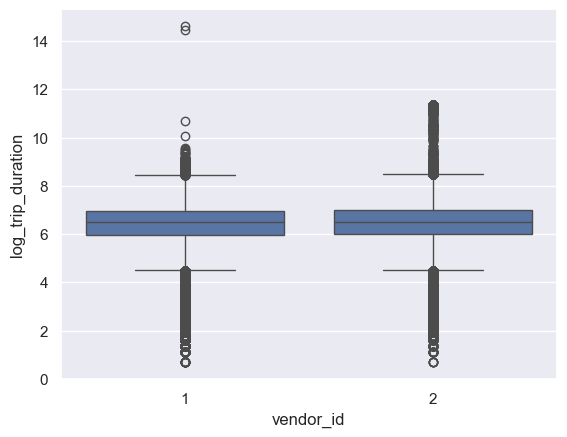

In [81]:
sns.boxplot(x='vendor_id', y='log_trip_duration', data=train)

<Axes: xlabel='passenger_count', ylabel='log_trip_duration'>

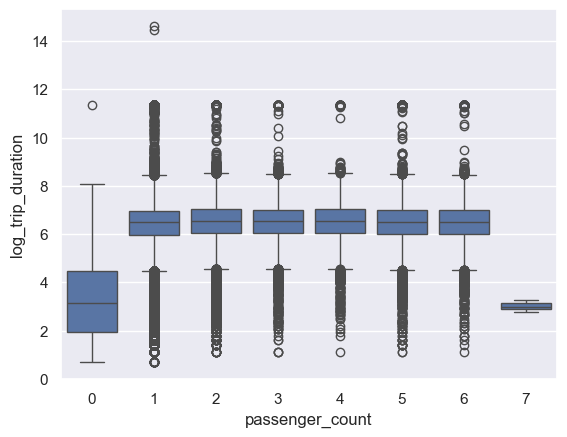

In [82]:
sns.boxplot(x='passenger_count', y='log_trip_duration', data=train)

<Axes: xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

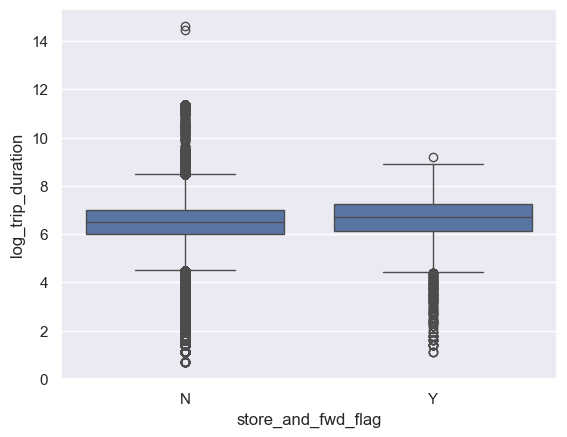

In [83]:
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=train)

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [84]:
train.loc[(train["vendor_id"] == 1), "vendor_id"] = 0
train.loc[(train["vendor_id"] == 2), "vendor_id"] = 1

test.loc[(test["vendor_id"] == 1), "vendor_id"] = 0
test.loc[(test["vendor_id"] == 2), "vendor_id"] = 1

train.loc[(train["store_and_fwd_flag"] == 'N'), "store_and_fwd_flag"] = 0
train.loc[(train["store_and_fwd_flag"] == 'Y'), "store_and_fwd_flag"] = 1

test.loc[(test["store_and_fwd_flag"] == 'N'), "store_and_fwd_flag"] = 0
test.loc[(test["store_and_fwd_flag"] == 'Y'), "store_and_fwd_flag"] = 1

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [85]:
X_train_ridge = train[["weekday", "month", "hour", "day_of_year", "anomaly_period", "log_haversine",
                       "trip_start", "trip_end", "traffic_jam", "traffic_free", "vendor_id", "store_and_fwd_flag", "passenger_count"]].copy()
y_train_ridge = train["log_trip_duration"].to_frame()

X_test_ridge = test[["weekday", "month", "hour", "day_of_year", "anomaly_period", "log_haversine",
                     "trip_start", "trip_end", "traffic_jam", "traffic_free", "vendor_id", "store_and_fwd_flag", "passenger_count"]].copy()
y_test_ridge = test["log_trip_duration"].to_frame()

In [86]:
categorical_features = ["weekday", "month", "hour", "anomaly_period", "trip_start", "trip_end",
                        "traffic_jam", "traffic_free", "vendor_id", "store_and_fwd_flag", "passenger_count"]
numeric_features = ["day_of_year", "log_haversine"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_ridge, y_train_ridge)

y_pred_train_ridge = model.predict(X_train_ridge)
y_pred_test_ridge = model.predict(X_test_ridge)

print("Train RMSE = %.4f" % mean_squared_error(y_train_ridge, y_pred_train_ridge, squared=False))
print("Train RMSLE = %.4f" % mean_squared_log_error(y_train_ridge, y_pred_train_ridge, squared=False))

print("Test RMSE = %.4f" % mean_squared_error(y_test_ridge, y_pred_test_ridge, squared=False))
print("Test RMSLE = %.4f" % mean_squared_log_error(y_test_ridge, y_pred_test_ridge, squared=False))

Train RMSE = 0.4823
Train RMSLE = 0.0712
Test RMSE = 0.4810
Test RMSLE = 0.0713


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

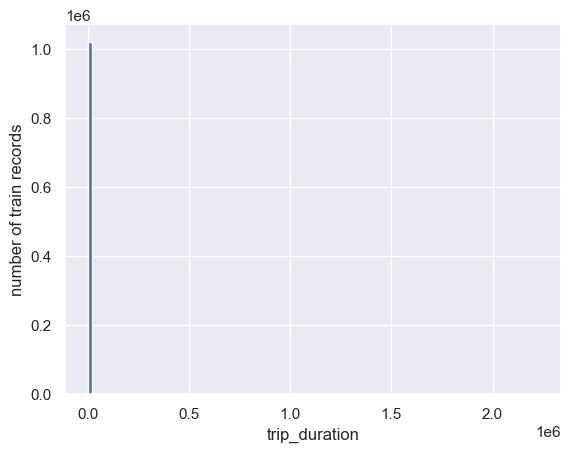

In [87]:
plt.hist(np.expm1(train["log_trip_duration"]), bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

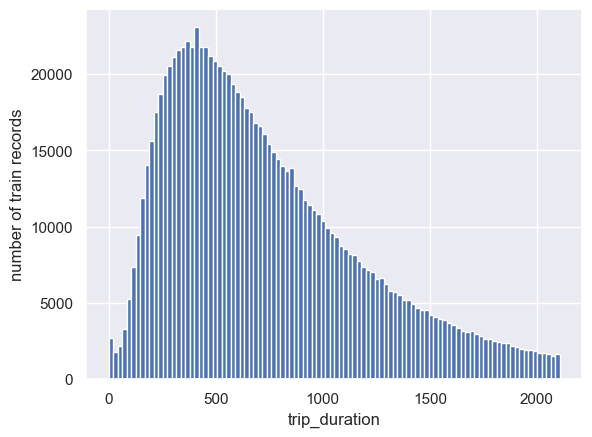

In [88]:
plt.hist(np.expm1(train.loc[(train['log_trip_duration'] < train['log_trip_duration'].quantile(0.95)), 'log_trip_duration']), bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

In [89]:
train = train[(train['log_trip_duration'] < train['log_trip_duration'].quantile(0.95))]

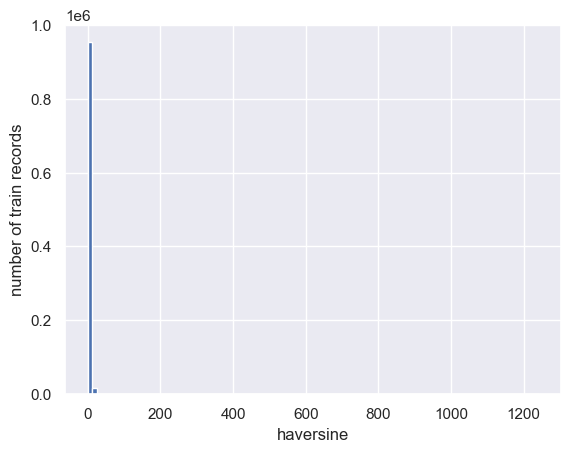

In [90]:
plt.hist(train["haversine"], bins=100)
plt.xlabel('haversine')
plt.ylabel('number of train records')
plt.show()

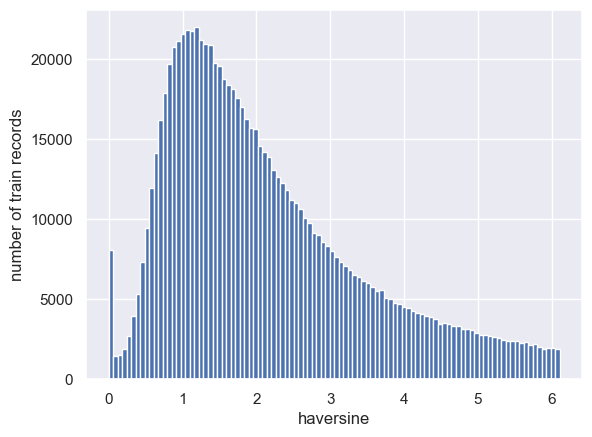

In [91]:
plt.hist(train.loc[(train['haversine'] < train['haversine'].quantile(0.90)), 'haversine'], bins=100)
plt.xlabel('haversine')
plt.ylabel('number of train records')
plt.show()

In [92]:
train = train[(train['haversine'] < train['haversine'].quantile(0.90))]

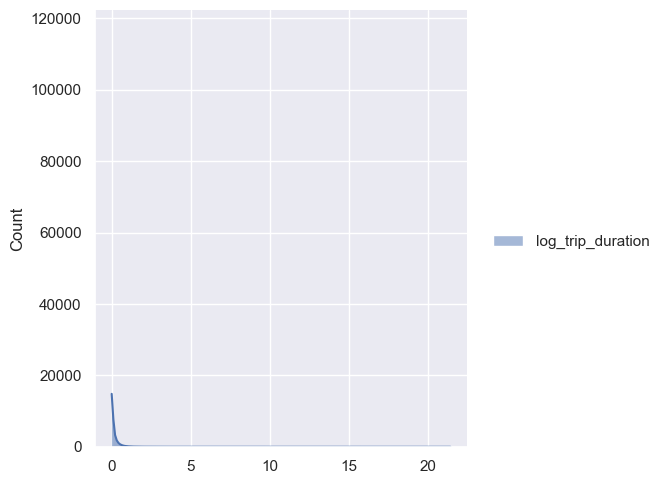

In [93]:
X_train_ridge = train[["weekday", "month", "hour", "day_of_year", "anomaly_period", "log_haversine",
                       "trip_start", "trip_end", "traffic_jam", "traffic_free"]].copy()
y_train_ridge = train["log_trip_duration"].to_frame()

X_test_ridge = test[["weekday", "month", "hour", "day_of_year", "anomaly_period", "log_haversine",
                     "trip_start", "trip_end", "traffic_jam", "traffic_free"]].copy()
y_test_ridge = test["log_trip_duration"].to_frame()


categorical_features = ["weekday", "month", "hour", "anomaly_period", "trip_start", "trip_end",
                        "traffic_jam", "traffic_free"]
numeric_features = ["day_of_year", "log_haversine"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_ridge, y_train_ridge)

y_pred_train_ridge = model.predict(X_train_ridge)

error = (y_train_ridge - y_pred_train_ridge)**2

sns.displot(error, kde=True)

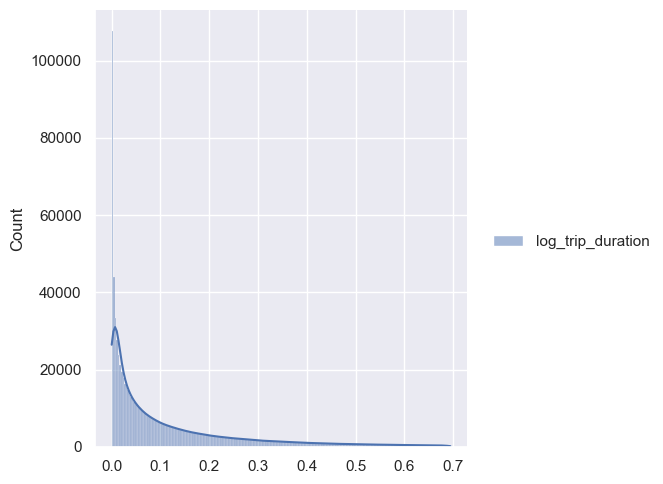

In [94]:
sns.displot(error[(error < error.quantile(0.95))], kde=True)

In [95]:
train = train.loc[error[(error < error.quantile(0.95))].index]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [96]:
categorical_features = ["weekday", "month", "hour", "anomaly_period", "trip_start", "trip_end",
                        "traffic_jam", "traffic_free", 'start_airport', 'end_airport']
numeric_features = ["day_of_year", "log_haversine"]

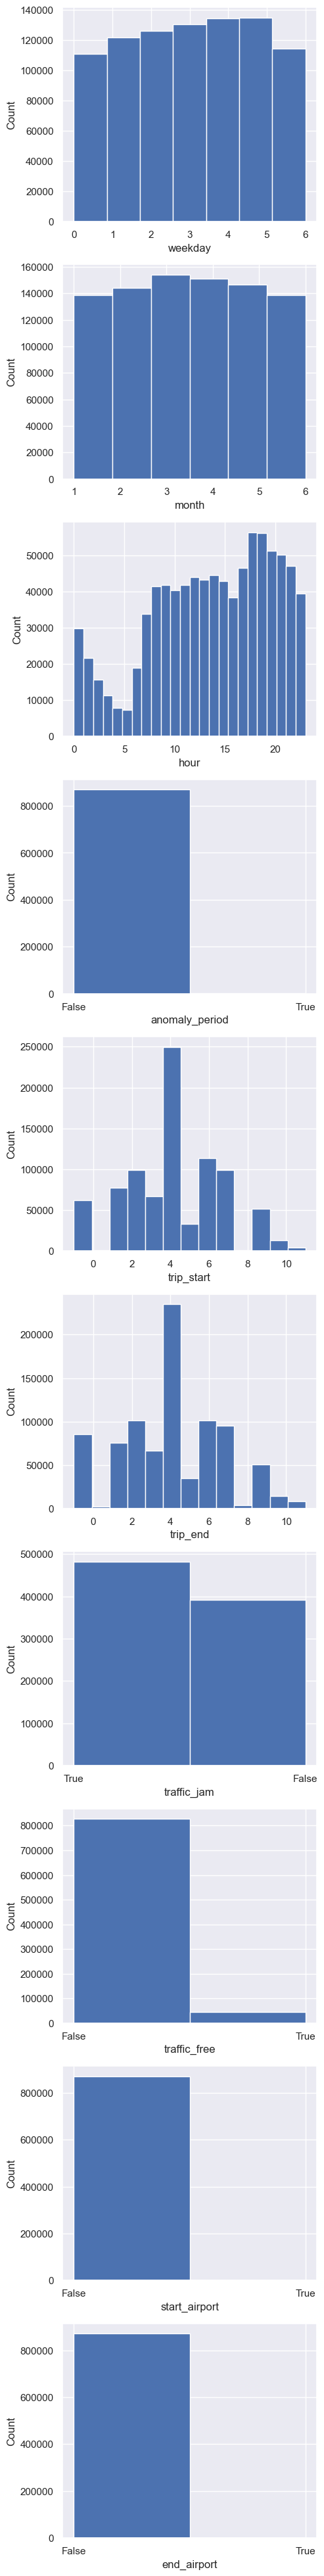

In [97]:
fig, axes = plt.subplots(len(categorical_features), 1, figsize = (5, 5 * len(categorical_features)))
for i, c in enumerate(categorical_features):
    if train[c].dtype is np.dtype(bool):
        axes[i].hist(train[c].map({True: 'True', False: 'False'}), bins=len(train[c].unique()))
    else:
        axes[i].hist(train[c], bins=len(train[c].unique()))
    axes[i].set(xlabel=c, ylabel="Count")

In [98]:
print("trip_start:", train["trip_start"].value_counts().sort_index())
print("trip_end:", train["trip_end"].value_counts().sort_index())

trip_start: trip_start
-1      62243
 0       1420
 1      77451
 2      99028
 3      66938
 4     249850
 5      33132
 6     113457
 7      99370
 8       1012
 9      52052
 10     13089
 11      3941
Name: count, dtype: int64
trip_end: trip_end
-1      85347
 0       2207
 1      75398
 2     101073
 3      66342
 4     235033
 5      34490
 6     101235
 7      95209
 8       3348
 9      50951
 10     14421
 11      7929
Name: count, dtype: int64


In [99]:
train.loc[(train["trip_start"] == 0), "trip_start"] = 8
train.loc[(train["trip_end"] == 0), "trip_end"] = 8

train.loc[(train["trip_start"] == 11), "trip_start"] = 8
train.loc[(train["trip_end"] == 11), "trip_end"] = 8

In [100]:
print("trip_start:", train["trip_start"].value_counts().sort_index())
print("trip_end:", train["trip_end"].value_counts().sort_index())

trip_start: trip_start
-1      62243
 1      77451
 2      99028
 3      66938
 4     249850
 5      33132
 6     113457
 7      99370
 8       6373
 9      52052
 10     13089
Name: count, dtype: int64
trip_end: trip_end
-1      85347
 1      75398
 2     101073
 3      66342
 4     235033
 5      34490
 6     101235
 7      95209
 8      13484
 9      50951
 10     14421
Name: count, dtype: int64


In [101]:
X_train_ridge = train[categorical_features + numeric_features].copy()
y_train_ridge = train["log_trip_duration"].to_frame()

X_test_ridge = test[categorical_features + numeric_features].copy()
y_test_ridge = test["log_trip_duration"].to_frame()

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_ridge, y_train_ridge)

y_pred_train_ridge = model.predict(X_train_ridge)
y_pred_test_ridge = model.predict(X_test_ridge)

print("Train RMSE = %.4f" % mean_squared_error(y_train_ridge, y_pred_train_ridge, squared=False))
print("Train RMSLE = %.4f" % mean_squared_log_error(y_train_ridge, y_pred_train_ridge, squared=False))

print("Test RMSE = %.4f" % mean_squared_error(y_test_ridge, y_pred_test_ridge, squared=False))
print("Test RMSLE = %.4f" % mean_squared_log_error(y_test_ridge, y_pred_test_ridge, squared=False))


Train RMSE = 0.4402
Train RMSLE = 0.0690
Test RMSE = 0.4914
Test RMSLE = 0.0710


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [102]:
X_train_ridge.shape

(872983, 12)

In [103]:
column_transformer.transform(X_train_ridge).shape

(872983, 71)

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [104]:
X_train = train[categorical_features + numeric_features].copy()
y_train = train["log_trip_duration"].to_frame()

X_test = test[categorical_features + numeric_features].copy()
y_test = test["log_trip_duration"].to_frame()

In [105]:
from sklearn.linear_model import Lasso

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train, squared=False))
print("Train RMSLE = %.4f" % mean_squared_log_error(y_train, y_pred_train, squared=False))

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test, squared=False))
print("Test RMSLE = %.4f" % mean_squared_log_error(y_test, y_pred_test, squared=False))


Train RMSE = 0.6875
Train RMSLE = 0.1038
Test RMSE = 0.8142
Test RMSLE = 0.1146


Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [123]:
X_train.index = list(range(len(X_train.index)))

In [125]:
train_index, validation_index = train_test_split(X_train, test_size=0.2, random_state=random_state)

Best alpha = 0.0100
Test RMSE = 0.5128
Best alpha = 0.0428
Test RMSE = 0.4914


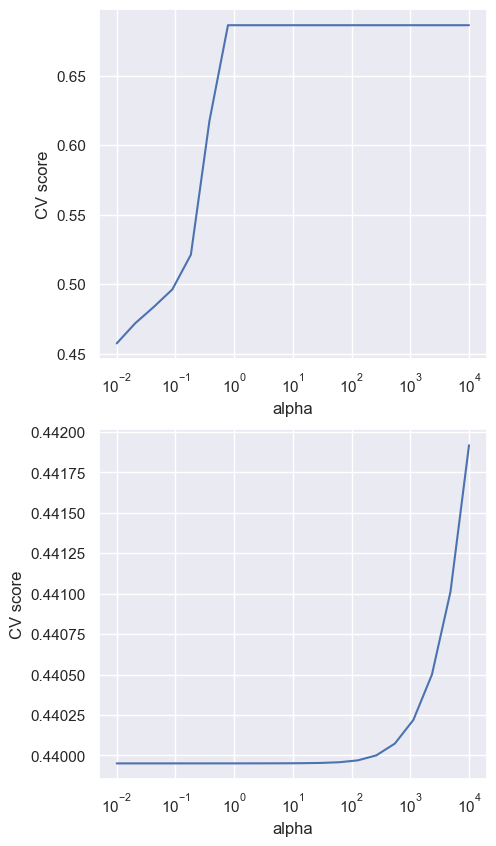

In [137]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 4, 20)

pipelines = [
    Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso())
    ]),
    Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Ridge())
    ])
]


best_alphas = []
fig, axes = plt.subplots(len(pipelines), 1, figsize = (5, 5 * len(pipelines)))

for i, p in enumerate(pipelines):
    # regression__ need to add to work with pipelines
    searcher = GridSearchCV(p, [{"regression__alpha": alphas}],
                                scoring="neg_root_mean_squared_error",
                                cv=[(train_index.index, validation_index.index)], n_jobs=-1)
    searcher.fit(X_train, y_train)
    best_alphas.append(searcher.best_params_["regression__alpha"])
    print("Best alpha = %.4f" % best_alphas[-1])

    y_pred_test = searcher.predict(X_test)
    print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test, squared=False))

    axes[i].plot(alphas, -searcher.cv_results_["mean_test_score"])
    axes[i].set(xlabel="alpha", ylabel="CV score", xscale="log")

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

Text(0, 0.5, 'num null elements')

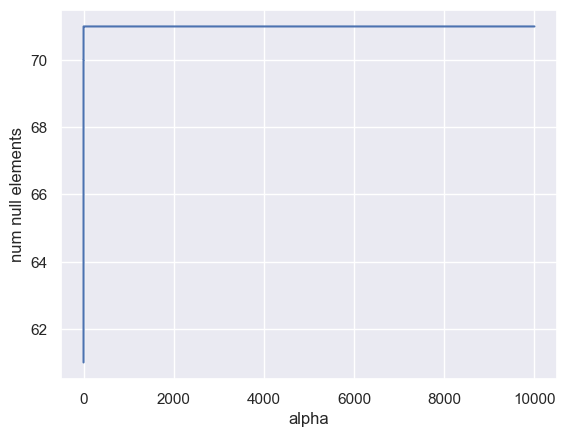

In [139]:
rmse = []
null_weights = []

for a in alphas:
    lasso = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(a))
    ])
    model = lasso.fit(X_train, y_train)
    y_pred_test = searcher.predict(X_test)

    rmse.append(mean_squared_error(y_test, y_pred_test, squared=False))
    null_weights.append(sum(model.named_steps['regression'].coef_==0))

plt.plot(alphas, null_weights)
plt.xlabel('alpha')
plt.ylabel('num null elements')

In [142]:
print(rmse)
print(alphas)
print(null_weights)

[0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224, 0.4913989417853224]
[1.00000000e-02 2.06913808e-02 4.28133240e-02 8.85866790e-02
 1.83298071e-01 3.79269019e-01 7.84759970e-01 1.62377674e+00
 3.35981829e+00 6.95192796e+00 1.43844989e+01 2.97635144e+01
 6.15848211e+01 1.27427499e+02 2.63665090e+02 5.45559478e+02
 1.12883789e+03 2.33572147e+03 4.83293024e+03 1.00000000e+04]
[61, 66, 68, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71]


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [165]:
X_train.head(2)

weekday  month  hour  anomaly_period  trip_start  trip_end  traffic_jam  \
0        2      2    10           False           1         4         True   
1        0      1    18           False           2         5         True   

   traffic_free  start_airport  end_airport  day_of_year  log_haversine  way  
0         False          False        False           48       1.377623   -1  
1         False          False        False            4       1.099319   -1

In [185]:
X_train['way'] = -1
X_test['way'] = -1

X_train['way_tmp'] = X_train['trip_start'].astype(str) + ', ' + X_train['trip_end'].astype(str)
X_test['way_tmp'] = X_test['trip_start'].astype(str) + ', ' + X_test['trip_end'].astype(str)
top_ways = X_train[(X_train['way_tmp'] != 'nan, nan') &
                   (X_train['trip_start'] != -1) & (X_train['trip_end'] != -1)].groupby(['way_tmp']).size().sort_values().tail(100)

In [186]:
X_train.loc[X_train['way_tmp'].isin(top_ways.index), 'way'] = X_train['way_tmp']
X_test.loc[X_test['way_tmp'].isin(top_ways.index), 'way'] = X_test['way_tmp']

In [187]:
X_train.drop("way_tmp", axis=1, inplace=True)
X_test.drop("way_tmp", axis=1, inplace=True)

In [191]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['way'] = X_train['way'].astype(str)
X_test['way'] = X_test['way'].astype(str)
X_train['way'] = le.fit_transform(X_train['way'])
X_test['way'] = le.fit_transform(X_test['way'])

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [196]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features + ["way"]),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)

y_pred_train_ridge = model.predict(X_train)
y_pred_test_ridge = model.predict(X_test)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train_ridge, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test_ridge, squared=False))

Train RMSE = 0.4279
Test RMSE = 0.4861


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [113]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [114]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [115]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.